In [2]:
import pandas as pd

df = pd.read_csv("C:\\Users\\GoodM\\OneDrive\\Escritorio\\ErickPython\\Rest-Mex_con_analisis.csv")

df.head(10)

,Title,Review,Polarity,Town,Region,Type,sentimiento_5
0,Mi Lugar Favorito!!!!,Excelente lugar para comer y pasar una buena n...,5.0,Sayulita,Nayarit,Restaurant,0.977972
1,lugares interesantes para visitar,"andar mucho, así que un poco difícil para pers...",4.0,Tulum,QuintanaRoo,Attractive,0.941615
2,No es el mismo Dreams,"Es nuestra cuarta visita a Dreams Tulum, elegi...",3.0,Tulum,QuintanaRoo,Hotel,0.916443
3,un buen panorama cerca de Cancún,"Estando en Cancún, fuimos al puerto y tomamos ...",4.0,Isla_Mujeres,QuintanaRoo,Attractive,0.656095
4,El mejor,Es un lugar antiguo y por eso me encanto tiene...,5.0,Patzcuaro,Michoacan,Hotel,0.976754
5,Preciosa,La mejor playa en la que he estado. Arena blan...,5.0,Tulum,QuintanaRoo,Attractive,0.975735
6,Maravillosa Playa.,Visitar la zona arqueologica de Tulum y disfru...,5.0,Tulum,QuintanaRoo,Attractive,0.947574
7,Un muy buen lugar para quedarse y comer en Pal...,Conozco Mayabel desde hace más de 15 años. Es ...,4.0,Palenque,Chiapas,Hotel,0.966742
8,Tiempo para mi...,"las instalaciones están hermosas, es de esos l...",4.0,Valle_de_Bravo,Estado_de_Mexico,Hotel,0.971769
9,Buena Ubicación y limpio,estuvimoa hospedados para participar en el eve...,4.0,Palenque,Chiapas,Hotel,0.965339


## Clusters de temas recurrentes en las reseñas (solo estaba viendo)

In [18]:
#pip install nltk

In [ ]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer

# Descargar stopwords si no las tienes
nltk.download('stopwords')
from nltk.corpus import stopwords

stopwords_es = stopwords.words('spanish')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\GoodM\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import MiniBatchKMeans
import time

# Elegir el texto a usar
col_texto = next((col for col in df.columns if 'review' in col.lower() or 'comentario' in col.lower() or 'text' in col.lower()), None)
if col_texto is None:
    raise ValueError("No se encontró columna de texto")

textos = df[col_texto].fillna("")

#  Configurar TF-IDF
tfidf = TfidfVectorizer(
    max_features=10000,    # reduce dimensionalidad
    stop_words=stopwords_es,  # elimina palabras comunes en español
    ngram_range=(1,2)      # unigrams y bigrams para capturar combinaciones
)

# Transformar textos a vectores
print("Generando TF-IDF vectors...")
start_time = time.time()
X = tfidf.fit_transform(textos)
end_time = time.time()
print(f"TF-IDF generado en {end_time - start_time:.2f} segundos")

# Configurar MiniBatchKMeans
n_clusters = 15  # ajusta según quieras más o menos clusters
kmeans = MiniBatchKMeans(
    n_clusters=n_clusters,
    batch_size=1000,  # tamaño de batch para acelerar
    random_state=42
)

# Ajustar y predecir clusters
print(f"Ejecutando MiniBatchKMeans con {n_clusters} clusters...")
start_time = time.time()
df['cluster'] = kmeans.fit_predict(X)
end_time = time.time()
print(f"Clustering completado en {end_time - start_time:.2f} segundos")

# Inspeccionar palabras clave de cada cluster
terms = tfidf.get_feature_names_out()
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]

for i in range(n_clusters):
    print(f"\nCluster {i}:")
    top_terms = [terms[ind] for ind in order_centroids[i, :10]]
    print(", ".join(top_terms))

# Revisar distribución de clusters
print("\nCantidad de reseñas por cluster:")
display(df['cluster'].value_counts())


Generando TF-IDF vectors...
TF-IDF generado en 28.08 segundos
Ejecutando MiniBatchKMeans con 15 clusters...
Clustering completado en 3.37 segundos

Cluster 0:
habitación, habitaciones, personal, hotel, piscina, desayuno, playa, bien, noche, amable

Cluster 1:
comida, restaurante, aquí, mejor, gran, lugar, increíble, personal, servicio, desayuno

Cluster 2:
hotel, habitaciones, personal, servicio, bien, excelente, restaurante, alberca, habitación, si

Cluster 3:
tacos, calidad, pescado, precio, relación, calidad precio, tacos pescado, relación calidad, comida, buena

Cluster 4:
excelente, servicio, excelente servicio, comida, deliciosa, comida deliciosa, servicio excelente, lugar, excelente comida, atención

Cluster 5:
playa, isla, mujeres, isla mujeres, lugar, norte, si, agua, mejor, mar

Cluster 6:
comida, servicio, lugar, bueno, rica, bien, buen, agradable, comida rica, ambiente

Cluster 7:
lugar, si, ver, historia, puedes, visitar, ir, visita, puede, agua

Cluster 8:
arena, playa, b

cluster
7     44326
1     30628
6     20304
2     16493
0     14269
9     13143
14    12896
5     11186
4     10161
12     9165
10     9090
11     6259
3      5472
13     2438
8      2221
Name: count, dtype: int64

In [30]:
# pip install umap

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import umap

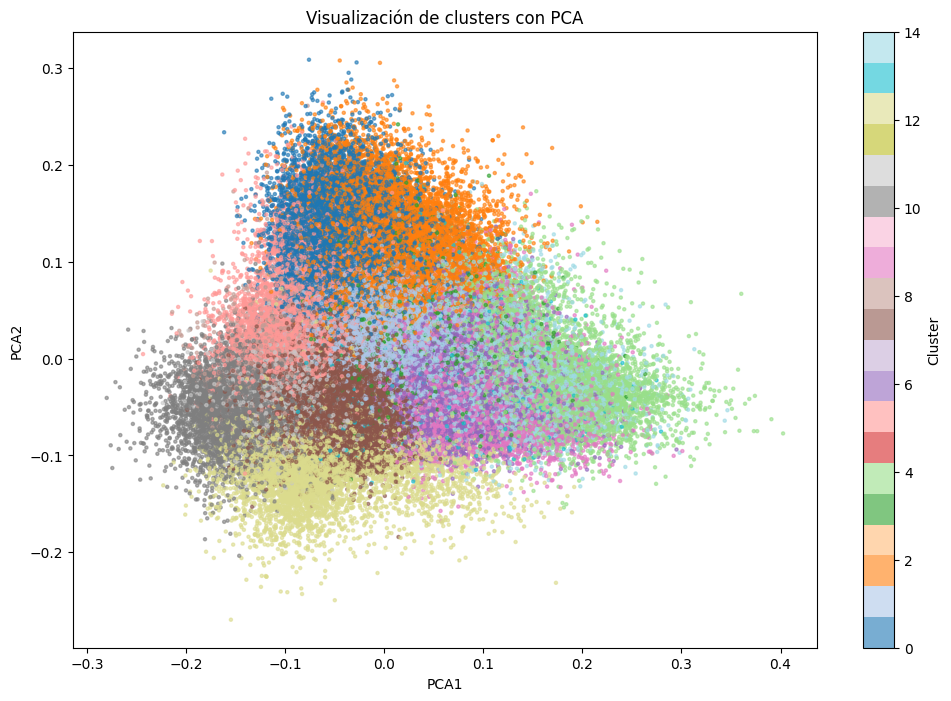

In [33]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X.toarray())  # pasar a array denso

plt.figure(figsize=(12,8))
plt.scatter(X_pca[:,0], X_pca[:,1], c=df['cluster'], cmap='tab20', s=5, alpha=0.6)
plt.colorbar(label='Cluster')
plt.title("Visualización de clusters con PCA")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()

In [36]:
#pip install --upgrade umap-learn

c:\Users\GoodM\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\GoodM\AppData\Local\Programs\Python\Python313\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


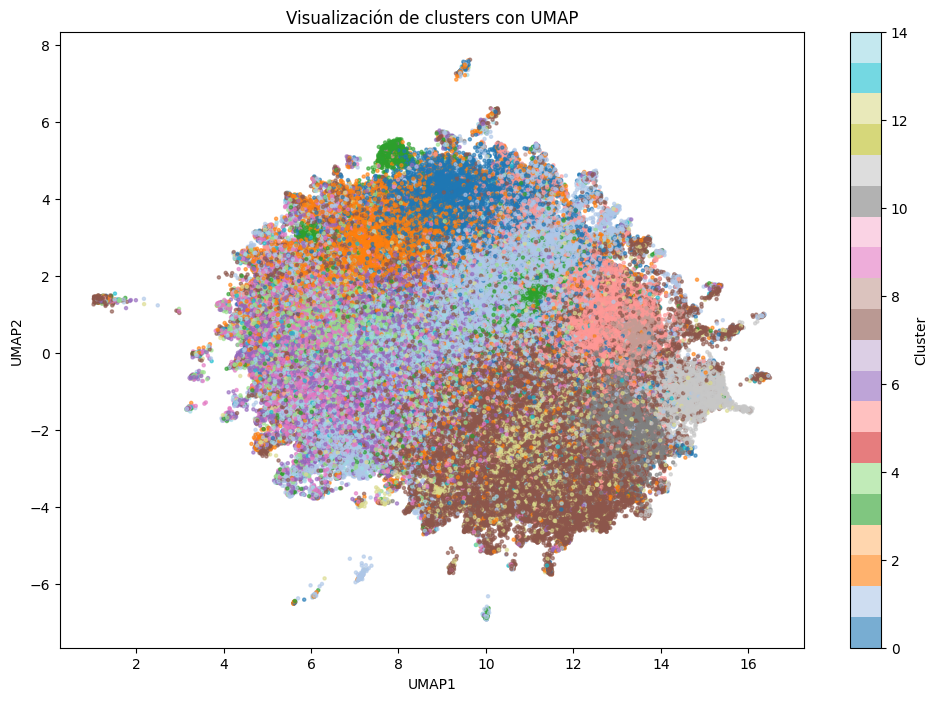

In [37]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import umap.umap_ as umap


reducer = umap.UMAP(n_neighbors=15, min_dist=0.3, n_components=2, random_state=42)
X_umap = reducer.fit_transform(X)

plt.figure(figsize=(12,8))
plt.scatter(X_umap[:,0], X_umap[:,1], c=df['cluster'], cmap='tab20', s=5, alpha=0.6)
plt.colorbar(label='Cluster')
plt.title("Visualización de clusters con UMAP")
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.show()



## Satisfacción Hotelera

### Filtrar reseñas que hablan de satisfacción hotelera

In [3]:
# Palabras clave para satisfacción hotelera (amplias pero relevantes)
palabras_clave_hotel = [
    'hotel', 'hospedaje', 'hospedar', 'hospedados', 'alojamiento', 'alojar',
    'habitación', 'habitaciones', 'cuarto', 'cuartos',
    'servicio', 'atención', 'atencion', 'personal', 'staff', 'recepción', 'recepcionista',
    'check in', 'check-in', 'check out', 'check-out',
    'cama', 'colchón', 'colchon', 'sábanas', 'sabanas', 'toallas',
    'limpieza', 'limpio', 'sucio',
    'ruido', 'ruidoso',
    'comodidad', 'cómodo', 'comodo', 'incomodo', 'incómodo',
    'desayuno', 'amenidades'
]

# Detectar columnas de texto y título
col_texto = next((col for col in df.columns if 'review' in col.lower() or 'comentario' in col.lower() or 'text' in col.lower()), None)
col_titulo = next((col for col in df.columns if 'title' in col.lower() or 'título' in col.lower()), None)

if col_texto is None and col_titulo is None:
    print('No se encontró columna de texto ni de título')
else:
    regex_hotel = '|'.join(palabras_clave_hotel)

    filtro_texto = df[col_texto].str.contains(regex_hotel, case=False, na=False) if col_texto else pd.Series([False]*len(df))
    filtro_titulo = df[col_titulo].str.contains(regex_hotel, case=False, na=False) if col_titulo else pd.Series([False]*len(df))

    # Filtro: palabras clave + registro cuyo Type sea hotel
    filtro_type_hotel = df['Type'].str.lower() == 'hotel'

    filtro_satisfaccion_hotelera = (filtro_texto | filtro_titulo) & filtro_type_hotel

    df_satisfaccion_hotelera = df[filtro_satisfaccion_hotelera]

    print(f"Total de registros de satisfacción hotelera: {len(df_satisfaccion_hotelera)}")
    display(df_satisfaccion_hotelera.head(20))

Total de registros de satisfacción hotelera: 49464


,Title,Review,Polarity,Town,Region,Type,sentimiento_5
2,No es el mismo Dreams,"Es nuestra cuarta visita a Dreams Tulum, elegi...",3.0,Tulum,QuintanaRoo,Hotel,0.916443
7,Un muy buen lugar para quedarse y comer en Pal...,Conozco Mayabel desde hace más de 15 años. Es ...,4.0,Palenque,Chiapas,Hotel,0.966742
9,Buena Ubicación y limpio,estuvimoa hospedados para participar en el eve...,4.0,Palenque,Chiapas,Hotel,0.965339
10,Gran labor del Gerente después de 5 años.,Hací­a 5 años que no visitaba el Hotel porque ...,4.0,Ixtapan_de_la_Sal,Estado_de_Mexico,Hotel,0.964497
13,Solo les importa el dinero,Hay un solo tipo de clientes para este hotel y...,1.0,Tulum,QuintanaRoo,Hotel,-0.982171
21,descanso familiar,elegí desde un principio directo en el centro ...,4.0,San_Cristobal_de_las_Casas,Chiapas,Hotel,-0.245613
22,Crazy Place (en el buen sentido),El propietario Harald y su esposa Sonia tienen...,5.0,Izamal,Yucatan,Hotel,0.950041
26,precioso bar frente a la playa,"Paramos en la playa por la tarde, dormimos en ...",4.0,Tulum,QuintanaRoo,Hotel,0.942494
28,"hermosa ubicación, pero no olvide el repelente...",Nos alojamos aquí por 3 noches al comienzo de ...,4.0,Tulum,QuintanaRoo,Hotel,0.908842
34,"Tulum, te extraño!",Diamente K es un pedazo de tranquilidad en Tul...,4.0,Tulum,QuintanaRoo,Hotel,0.930243


### Media de sentimiento por cada pueblo

In [4]:
# Calcular media de sentimiento_5 por pueblo (Town)
media_satisfaccion_por_town = (
    df_satisfaccion_hotelera
        .groupby("Town")["sentimiento_5"]
        .mean()
        .sort_values(ascending=False)
)

print("Media de sentimiento_5 por Town (satisfacción hotelera):")
display(media_satisfaccion_por_town)

Media de sentimiento_5 por Town (satisfacción hotelera):


Town
Cholula                       0.921254
Mazunte                       0.848964
TodosSantos                   0.830202
Patzcuaro                     0.801735
Loreto                        0.766299
Tapalpa                       0.737032
Izamal                        0.727179
Sayulita                      0.724706
Valladolid                    0.724012
Tulum                         0.721073
Coatepec                      0.720116
Cuetzalan                     0.706306
Parras                        0.704765
Cuatro_Cienegas               0.683234
San_Cristobal_de_las_Casas    0.675877
Bacalar                       0.670580
Palenque                      0.667918
Creel                         0.655400
Isla_Mujeres                  0.654495
Xilitla                       0.649231
Teotihuacan                   0.639602
Malinalco                     0.620445
Metepec                       0.547630
Tequila                       0.544372
Zacatlan                      0.540640
Ajijic              

### Ponderación de 1-5

In [5]:
media = media_satisfaccion_por_town  # tu serie original

# Transformación lineal de [-1,1] → [0,5]
ponderacion_hotel = ((media + 1) * 5) / 2

ponderacion_hotel = ponderacion_hotel.sort_values(ascending=False)

print("Ponderación 1–5 por Town:")
display(ponderacion_hotel)

Ponderación 1–5 por Town:


Town
Cholula                       4.803135
Mazunte                       4.622409
TodosSantos                   4.575504
Patzcuaro                     4.504337
Loreto                        4.415748
Tapalpa                       4.342581
Izamal                        4.317948
Sayulita                      4.311765
Valladolid                    4.310031
Tulum                         4.302681
Coatepec                      4.300290
Cuetzalan                     4.265764
Parras                        4.261913
Cuatro_Cienegas               4.208085
San_Cristobal_de_las_Casas    4.189693
Bacalar                       4.176449
Palenque                      4.169796
Creel                         4.138501
Isla_Mujeres                  4.136237
Xilitla                       4.123078
Teotihuacan                   4.099005
Malinalco                     4.051114
Metepec                       3.869074
Tequila                       3.860929
Zacatlan                      3.851599
Ajijic              

## Lo mismo pero para satisfacción de restaurantes

In [6]:
# Filtrar solo restaurants
df_restaurants = df[df['Type'].str.lower() == 'restaurant'].copy()

# Palabras clave para satisfacción en restaurantes
palabras_clave_restaurant = [
    # Comida
    'comida', 'platillo', 'platillos', 'plato', 'sabroso', 'delicioso', 'rico', 'rica',
    'sabor', 'sabores', 'insípido', 'insipido', 'frío', 'fria', 'frio', 'caliente', 
    'crudo', 'quemado', 'porción', 'porcion', 'porciones',

    # Servicio
    'servicio', 'atención', 'atencion', 'mesero', 'mesera', 'meseros', 'meseras',
    'camarero', 'camarera', 'staff', 'personal', 'host', 'hostess',

    # Tiempo
    'tardar', 'tardado', 'rápido', 'rapido', 'lento', 'demora', 'espera',

    # Ambiente
    'ambiente', 'ruidoso', 'tranquilo', 'musica', 'música',

    # Precio
    'caro', 'caros', 'carisimo', 'carísimo', 'económico', 'económica', 'barato', 'barata',
    'precio', 'precios', 'costoso',

    # Limpieza
    'limpio', 'limpia', 'sucio', 'sucia', 'higiene',

    # Experiencia general
    'recomiendo', 'volvería', 'volveria', 'experiencia', 'excelente', 'pésimo', 'pesimo',
    'malo', 'bueno', 'regular', 'delicia', 'atmosfera', 'atmósfera'
]

# Detectar columnas de texto
col_texto = next((col for col in df_restaurants.columns 
                  if 'review' in col.lower() or 'comentario' in col.lower() or 'text' in col.lower()), None)

col_titulo = next((col for col in df_restaurants.columns 
                   if 'title' in col.lower() or 'título' in col.lower()), None)

if col_texto is None and col_titulo is None:
    print("No se encontró columna de texto ni título")
else:
    regex_rest = '|'.join(palabras_clave_restaurant)

    filtro_texto = df_restaurants[col_texto].str.contains(regex_rest, case=False, na=False) \
        if col_texto else pd.Series([False]*len(df_restaurants))

    filtro_titulo = df_restaurants[col_titulo].str.contains(regex_rest, case=False, na=False) \
        if col_titulo else pd.Series([False]*len(df_restaurants))

    filtro_satisfaccion_restaurant = filtro_texto | filtro_titulo

    df_satisfaccion_restaurant = df_restaurants[filtro_satisfaccion_restaurant]

    print(f"Total de registros de satisfacción en restaurantes: {len(df_satisfaccion_restaurant)}")
    display(df_satisfaccion_restaurant.head(20))


Total de registros de satisfacción en restaurantes: 83121


,Title,Review,Polarity,Town,Region,Type,sentimiento_5
0,Mi Lugar Favorito!!!!,Excelente lugar para comer y pasar una buena n...,5.0,Sayulita,Nayarit,Restaurant,0.977972
11,la comalada está riquísima y no es caro,buen precio y calidad. Gente de ahí mismo de c...,5.0,Creel,Chihuahua,Restaurant,-0.137880
12,Excelente Pozole estilo Guerrero,Puedes hacer tus comidas de todo el dia con Ti...,4.0,Taxco,Guerrero,Restaurant,0.965876
16,Bueno pero muy moderno,"Buen servicio, buena carta de vinos, la carta ...",4.0,San_Cristobal_de_las_Casas,Chiapas,Restaurant,0.921826
17,"Muy buen lugar, un excelente servicio","El lugar es muy agradable, el buffet que proba...",5.0,Atlixco,Puebla,Restaurant,0.969826
19,La terraza con la mejor vista,"Toda la comida deliciosa, presentación padrisi...",5.0,Tequisquiapan,Queretaro,Restaurant,0.978501
24,Joya de restaurante,Platos frescos y un excelente servicio. Comimo...,5.0,Sayulita,Nayarit,Restaurant,0.976039
25,"Muy normal, lo mejor la ubicación.","Muy bien ubicado, da a la plaza del Zócalo de ...",3.0,Taxco,Guerrero,Restaurant,0.913362
27,que rico se desayuna,el bufete esta de primera.. atención buena... ...,5.0,Teotihuacan,Estado_de_Mexico,Restaurant,0.970317
32,Deliciosa pasta casera!,Comimos aquí como un grupo de nueve. Detenido ...,5.0,Sayulita,Nayarit,Restaurant,0.973009


In [7]:
# Media de sentimiento_5 por pueblo
media_satisfaccion_restaurant = (
    df_satisfaccion_restaurant
        .groupby("Town")["sentimiento_5"]
        .mean()
        .sort_values(ascending=False)
)

print("Media de sentimiento_5 por Town (satisfacción en restaurantes):")
display(media_satisfaccion_restaurant)

Media de sentimiento_5 por Town (satisfacción en restaurantes):


Town
Tulum                         0.866054
Isla_Mujeres                  0.836469
San_Cristobal_de_las_Casas    0.826826
Metepec                       0.821938
Malinalco                     0.820762
Atlixco                       0.812494
Bacalar                       0.812217
Valladolid                    0.805302
Loreto                        0.793189
Huasca_de_Ocampo              0.789473
Real_de_Catorce               0.789264
Valle_de_Bravo                0.787483
Sayulita                      0.784423
Izamal                        0.771664
TodosSantos                   0.752771
Ajijic                        0.749995
Mazunte                       0.742840
Cuetzalan                     0.740230
Ixtapan_de_la_Sal             0.720525
Tequila                       0.716099
Coatepec                      0.710309
Patzcuaro                     0.707591
Tepotzotlan                   0.701668
Cholula                       0.698515
Dolores_Hidalgo               0.682122
Taxco               

In [ ]:
# Ponderación 0-5
ponderacion_0a5_restaurant = ((media_satisfaccion_restaurant + 1) * 5) / 2
ponderacion_0a5_restaurant = ponderacion_0a5_restaurant.sort_values(ascending=False)

print("Ponderación 0–5 por Town (Restaurantes):")
display(ponderacion_0a5_restaurant)

Ponderación 0–5 por Town (Restaurantes):


Town
Tulum                         4.665134
Isla_Mujeres                  4.591173
San_Cristobal_de_las_Casas    4.567064
Metepec                       4.554845
Malinalco                     4.551905
Atlixco                       4.531236
Bacalar                       4.530542
Valladolid                    4.513256
Loreto                        4.482973
Huasca_de_Ocampo              4.473682
Real_de_Catorce               4.473161
Valle_de_Bravo                4.468708
Sayulita                      4.461058
Izamal                        4.429159
TodosSantos                   4.381928
Ajijic                        4.374988
Mazunte                       4.357099
Cuetzalan                     4.350576
Ixtapan_de_la_Sal             4.301312
Tequila                       4.290248
Coatepec                      4.275772
Patzcuaro                     4.268977
Tepotzotlan                   4.254171
Cholula                       4.246287
Dolores_Hidalgo               4.205305
Taxco               

## Satisfaccion de atractivo turistico

In [10]:
palabras_clave_attractive = [
    # Positivas
    'atractivo', 'atractivos', 'visita', 'visitar', 'paseo', 'paisaje',
    'tour', 'recorrido', 'entrada', 'guía', 'guia',
    'maravilloso', 'hermoso', 'bonito', 'increíble', 'divertido',
    'panorámico', 'vista', 'cultural', 'histórico', 'historia',
    'cenote', 'ruinas', 'monumento', 'naturaleza', 'parque', 'experiencia',

    # Negativas / críticas
    'malo', 'malos', 'feo', 'decepcionante', 'difícil', 'complicado',
    'caro', 'sucio', 'descuidado', 'lleno', 'ruidoso', 'peligroso',
    'lento', 'estresante', 'problema', 'incomodo', 'incomoda', 'mal estado',
    'mal servicio', 'pésimo', 'limitado', 'peor', 'desagradable'
]

In [11]:
# Columna de texto y título
col_texto = next((col for col in df.columns if 'review' in col.lower() or 'comentario' in col.lower() or 'text' in col.lower()), None)
col_titulo = next((col for col in df.columns if 'title' in col.lower() or 'título' in col.lower()), None)

regex_attractive = '|'.join(palabras_clave_attractive)

filtro_texto = df[col_texto].str.contains(regex_attractive, case=False, na=False) if col_texto else pd.Series([False]*len(df))
filtro_titulo = df[col_titulo].str.contains(regex_attractive, case=False, na=False) if col_titulo else pd.Series([False]*len(df))

filtro_type_attractive = df['Type'].str.lower() == 'attractive'

filtro_satisfaccion_attractive = (filtro_texto | filtro_titulo) & filtro_type_attractive

df_satisfaccion_attractive = df[filtro_satisfaccion_attractive]

print(f"Total de registros de satisfacción de atractivos turísticos: {len(df_satisfaccion_attractive)}")
display(df_satisfaccion_attractive.head(20))

Total de registros de satisfacción de atractivos turísticos: 58540


,Title,Review,Polarity,Town,Region,Type,sentimiento_5
1,lugares interesantes para visitar,"andar mucho, así que un poco difícil para pers...",4.0,Tulum,QuintanaRoo,Attractive,0.941615
6,Maravillosa Playa.,Visitar la zona arqueologica de Tulum y disfru...,5.0,Tulum,QuintanaRoo,Attractive,0.947574
20,Visita al malecón,"Agradable lugar con vista a la laguna, muy arb...",3.0,Ajijic,Jalisco,Attractive,0.974012
30,El alma de Michoacán,"Así como Michoacán es alma de México, Janitzio...",5.0,Patzcuaro,Michoacan,Attractive,0.954155
31,Esnórquel y un recorrido de este,"preciosas vistas al mar azul, desean ver 3 edi...",5.0,Tulum,QuintanaRoo,Attractive,0.953365
41,No hay servicio,El lugar es divino las grutas son algo diferen...,3.0,Tulum,QuintanaRoo,Attractive,0.535212
52,bellas!!,"Fui en marzo del 2014, son unas peque;as ruina...",4.0,Tulum,QuintanaRoo,Attractive,0.131120
57,Buena visita,Muy comercial le hace falta explicar cómo se f...,3.0,Huasca_de_Ocampo,Hidalgo,Attractive,0.161645
68,EXTRAORDINARIO ARTE CHURRIGUERESCO,Maravilla arquitectónica de arte churrigueresc...,5.0,Taxco,Guerrero,Attractive,0.949257
69,Gran Cenote y fácil de llegar a Tulum,Los cenotes son increíbles y este no es la exc...,4.0,Tulum,QuintanaRoo,Attractive,0.868989


In [12]:
media_satisfaccion_attractive = (
    df_satisfaccion_attractive
        .groupby("Town")["sentimiento_5"]
        .mean()
        .sort_values(ascending=False)
)

print("Media de sentimiento_5 por Town (atractivos turísticos):")
display(media_satisfaccion_attractive)

Media de sentimiento_5 por Town (atractivos turísticos):


Town
Tequisquiapan                 0.872176
Coatepec                      0.849535
Loreto                        0.846252
Tepotzotlan                   0.815957
Tlaquepaque                   0.806301
Ajijic                        0.806099
Zacatlan                      0.792237
Orizaba                       0.789451
Cuetzalan                     0.768409
Malinalco                     0.754291
Tequila                       0.753363
Bacalar                       0.753266
Dolores_Hidalgo               0.748656
Creel                         0.745931
Valladolid                    0.742591
TodosSantos                   0.740546
Mazunte                       0.736020
Izamal                        0.730892
San_Cristobal_de_las_Casas    0.726821
Cholula                       0.722430
Isla_Mujeres                  0.720375
Taxco                         0.713852
Teotihuacan                   0.703004
Huasca_de_Ocampo              0.695059
Xilitla                       0.692053
Tapalpa             

In [13]:
# Ponderación 0-5
ponderacion_0a5_attractive = ((media_satisfaccion_attractive + 1) * 5) / 2
ponderacion_0a5_attractive = ponderacion_0a5_attractive.sort_values(ascending=False)

print("Ponderación 0–5 por Town (atractivos turísticos):")
display(ponderacion_0a5_attractive)

Ponderación 0–5 por Town (atractivos turísticos):


Town
Tequisquiapan                 4.680440
Coatepec                      4.623837
Loreto                        4.615630
Tepotzotlan                   4.539893
Tlaquepaque                   4.515753
Ajijic                        4.515246
Zacatlan                      4.480593
Orizaba                       4.473629
Cuetzalan                     4.421022
Malinalco                     4.385728
Tequila                       4.383408
Bacalar                       4.383166
Dolores_Hidalgo               4.371640
Creel                         4.364828
Valladolid                    4.356477
TodosSantos                   4.351364
Mazunte                       4.340051
Izamal                        4.327229
San_Cristobal_de_las_Casas    4.317053
Cholula                       4.306074
Isla_Mujeres                  4.300938
Taxco                         4.284629
Teotihuacan                   4.257510
Huasca_de_Ocampo              4.237647
Xilitla                       4.230132
Tapalpa             

In [17]:
import pandas as pd


# Crear DataFrame combinando las tres series
df_satisfaccion = pd.DataFrame({
    'Satisfaccion_Hotelera': ponderacion_hotel.round(2),
    'Satisfaccion_Restaurantes': ponderacion_0a5_restaurant.round(2),
    'Satisfaccion_General_AtractivoTuristico': ponderacion_0a5_attractive.round(2)
})

# Guardar en CSV
df_satisfaccion.to_csv('indicadores.csv', index_label='Town')

# Mostrar las primeras filas
display(df_satisfaccion.head())


,Satisfaccion_Hotelera,Satisfaccion_Restaurantes,Satisfaccion_General_AtractivoTuristico
Town,,,
Ajijic,3.85,4.37,4.52
Atlixco,3.40,4.53,4.00
Bacalar,4.18,4.53,4.38
Bernal,3.24,4.18,4.11
Chiapa_de_Corzo,3.26,4.16,4.00
